In [2]:
## Instalacion solenciosa de missigno
## ( No muestra output)
%%capture
!pip install missingno

## importamos las librerías necesarias para realizar nuestro procesamiento y limpieza de datos

In [3]:
#importar las livrerias esenciales
import pandas as pd # para manejo de datos
import numpy as np  # para operaciones numéricas
import plotly as pl # para visualizaciones interactivas
import seaborn as sns # para graficos estadisticos
import missingno as msno # para visiualizar datos faltantes

## Cargamos el dataset de kiva_loans.csv para trabajar

In [7]:
# cargamos nuestro dataset principal
df = pd.read_csv('kiva_loans.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/kiva_loans.csv')

In [ ]:
# Aseguramos nuestro dataset principal
df = pd.DataFrame(df)

In [8]:
# Echamos un vistazo a las primeras 20 filas
df.head(20)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12.0,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14.0,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6.0,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8.0,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16.0,NaN,female,monthly,2014-01-01
5,1080148,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,NaN,2014-01-01 10:06:19+00:00,2014-01-30 01:42:48+00:00,2014-01-29 14:14:57+00:00,4.0,6.0,NaN,female,irregular,2014-01-01
6,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:51:02+00:00,2013-12-16 08:00:00+00:00,2014-01-01 17:18:09+00:00,43.0,8.0,"user_favorite, user_favorite",female,bullet,2014-01-01
7,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,Ellahabad,PKR,245.0,2014-01-01 11:46:01+00:00,2013-12-20 08:00:00+00:00,2014-01-10 18:18:44+00:00,14.0,8.0,"#Elderly, #Woman Owned Biz",female,monthly,2014-01-01
8,653082,475.0,475.0,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,Lahore,PKR,245.0,2014-01-01 11:49:43+00:00,2013-12-20 08:00:00+00:00,2014-01-01 18:47:21+00:00,14.0,19.0,user_favorite,female,monthly,2014-01-01
9,653048,625.0,625.0,Food Production/Sales,Food,"to buy a stall, gram flour, ketchup, and coal ...",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 05:41:03+00:00,2013-12-17 08:00:00+00:00,2014-01-03 15:45:04+00:00,11.0,24.0,NaN,female,irregular,2014-01-01


## Estadistica descriptiva


In [ ]:
#
df.shape

(671205, 20)

In [ ]:
# informacion general del dataset
# tipos de datos, nulos, uso de memoria.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [ ]:
# conectamos valores no nulos por columna
df. count()

,0
id,671205
funded_amount,671205
loan_amount,671205
activity,671205
sector,671205
use,666973
country_code,671197
country,671205
region,614405
currency,671205


In [ ]:
# estadisticas descriptivas de las columnas numericas
df.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [ ]:
# buscamos duplicados
df.duplicated().sum()

np.int64(0)

# ¿ hay valores nulos?

In [ ]:
# contamos nulos por cplumnas, ordedos de mayor a menor
df.isna().sum().sort_values(ascending=False)

,0
tags,171416
region,56800
funded_time,48331
partner_id,13507
use,4232
borrower_genders,4221
disbursed_time,2396
country_code,8
activity,0
loan_amount,0


¿ son mas del 25% ?


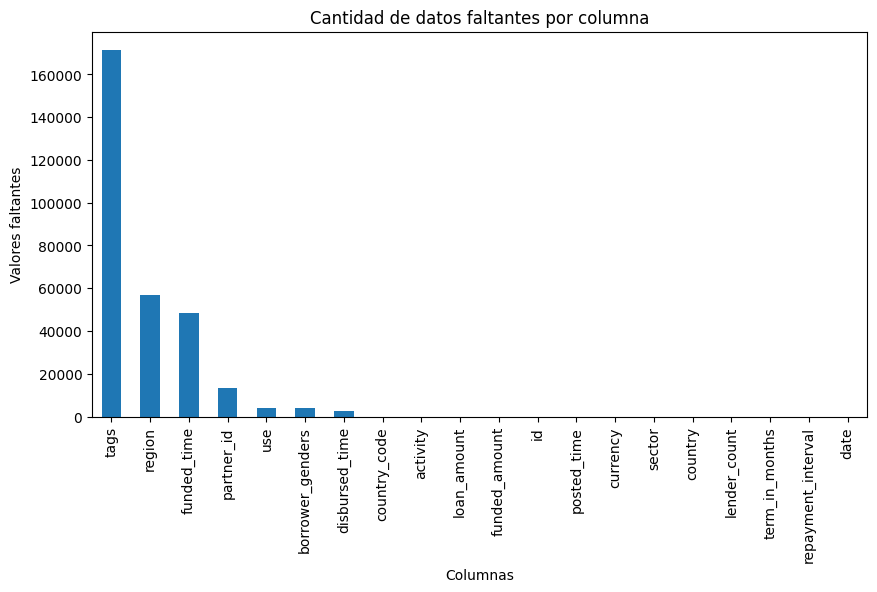

In [ ]:
# verificamos si los nulos superan el 25%
import matplotlib.pyplot as plt
# calcular % de nulos
missing = df.isna().sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5)) # es el lienzo
missing.plot(kind='bar') # para llamar a la variable
plt.title('Cantidad de datos faltantes por columna') # titulo de grafica
plt.xlabel('Columnas') #
plt.ylabel('Valores faltantes') #
plt.show() #

In [ ]:
missing_pct = (df.isna().mean () *100).sort_values(ascending=False)
print(missing_pct)

tags                  25.538546
region                 8.462392
funded_time            7.200632
partner_id             2.012351
use                    0.630508
borrower_genders       0.628869
disbursed_time         0.356970
country_code           0.001192
activity               0.000000
loan_amount            0.000000
funded_amount          0.000000
id                     0.000000
posted_time            0.000000
currency               0.000000
sector                 0.000000
country                0.000000
lender_count           0.000000
term_in_months         0.000000
repayment_interval     0.000000
date                   0.000000
dtype: float64


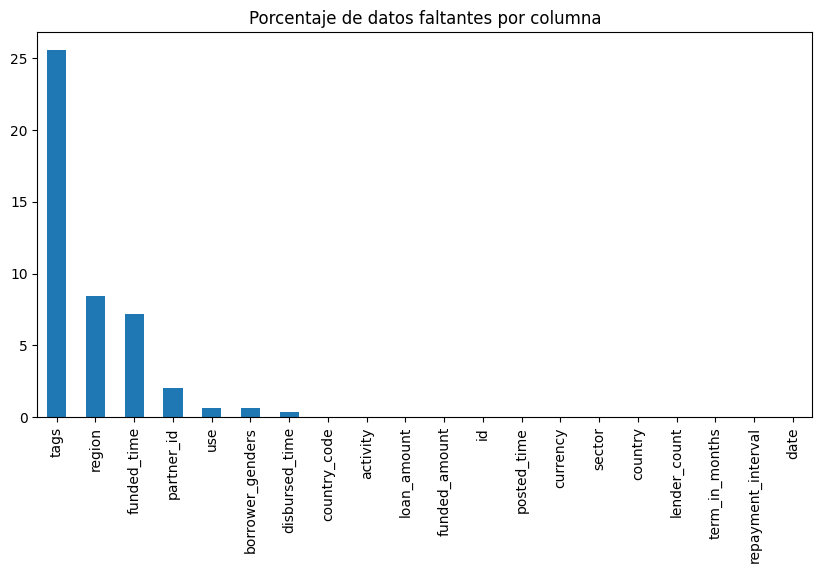

In [ ]:
missing_pct = (df.isna().mean () *100).sort_values(ascending=False)
plt.figure(figsize=(10,5))
missing_pct.plot(kind='bar')
plt.title('Porcentaje de datos faltantes por columna')
plt.show()

## la columna tags tiene muchos valores faltantes, deberia borrarla porque no aporta informacion de valor

<Axes: >

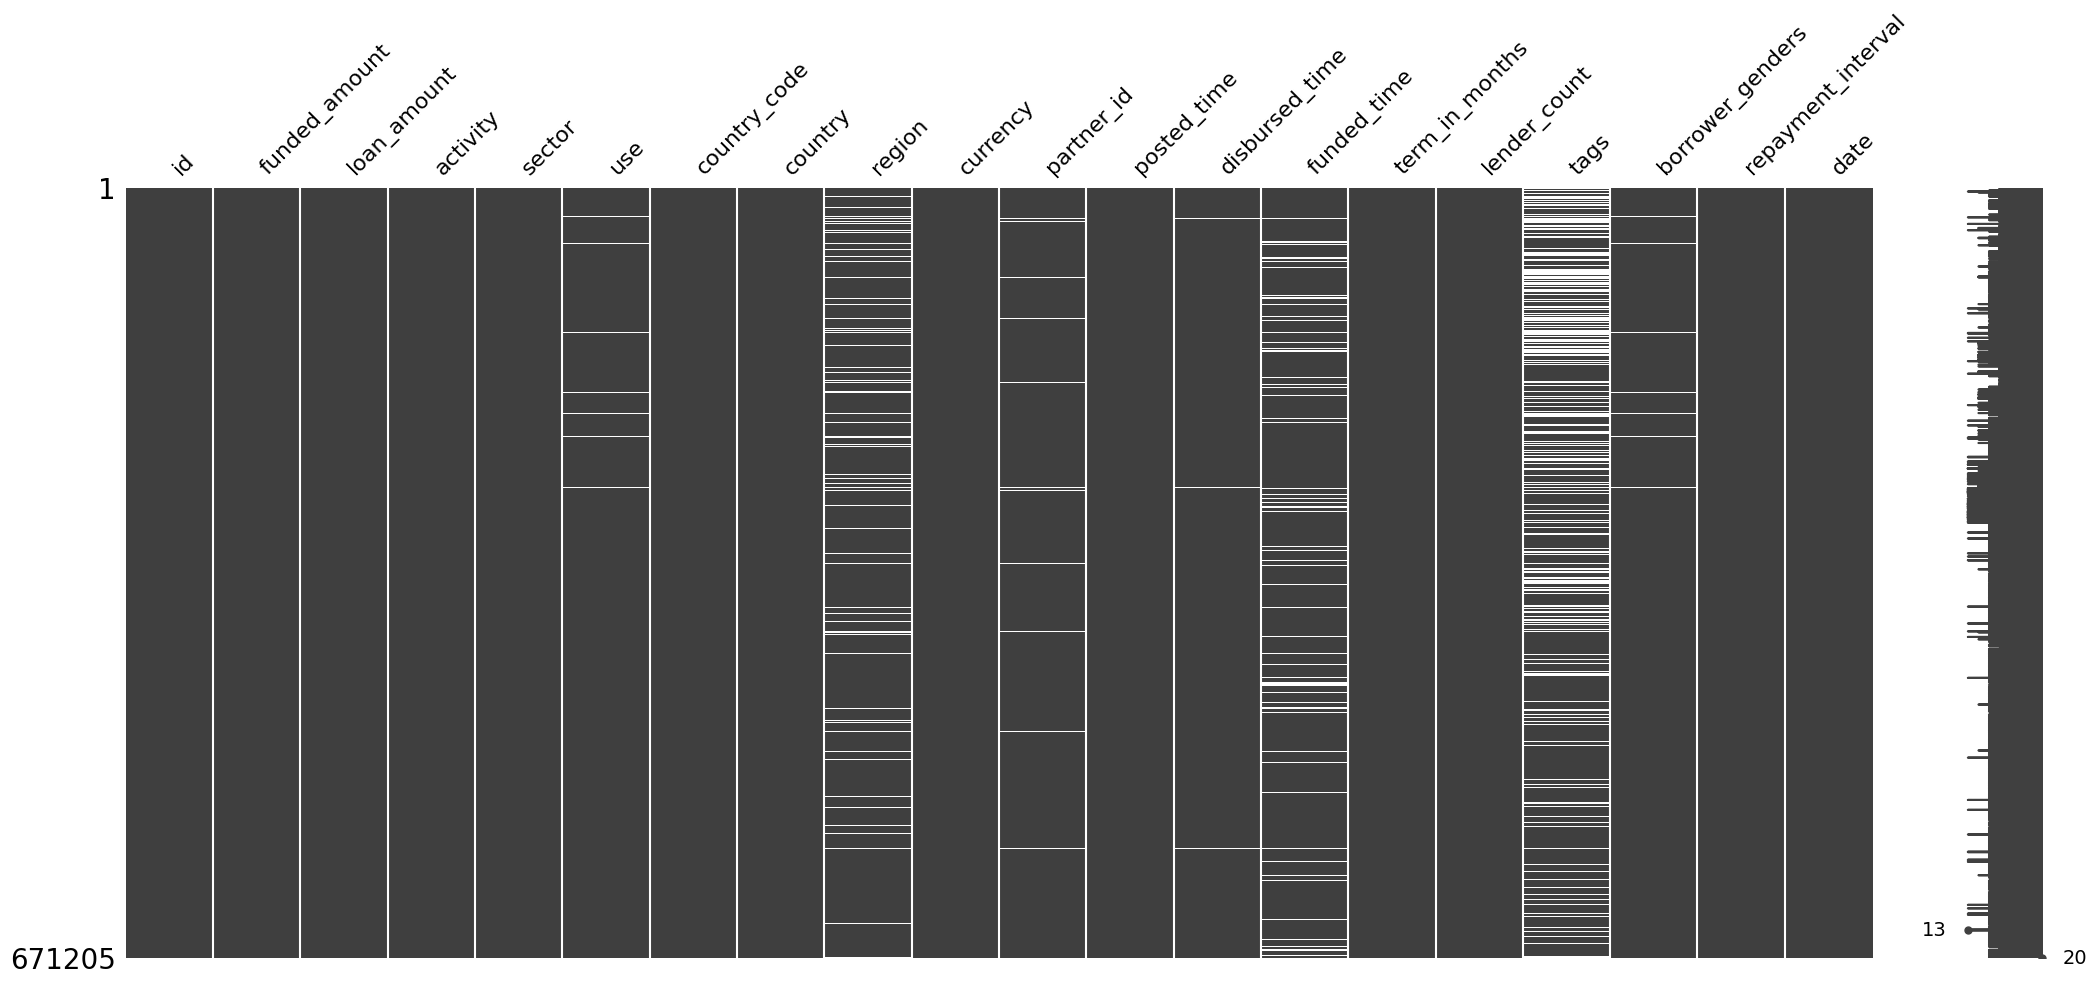

In [ ]:
msno.matrix(df)

<Axes: >

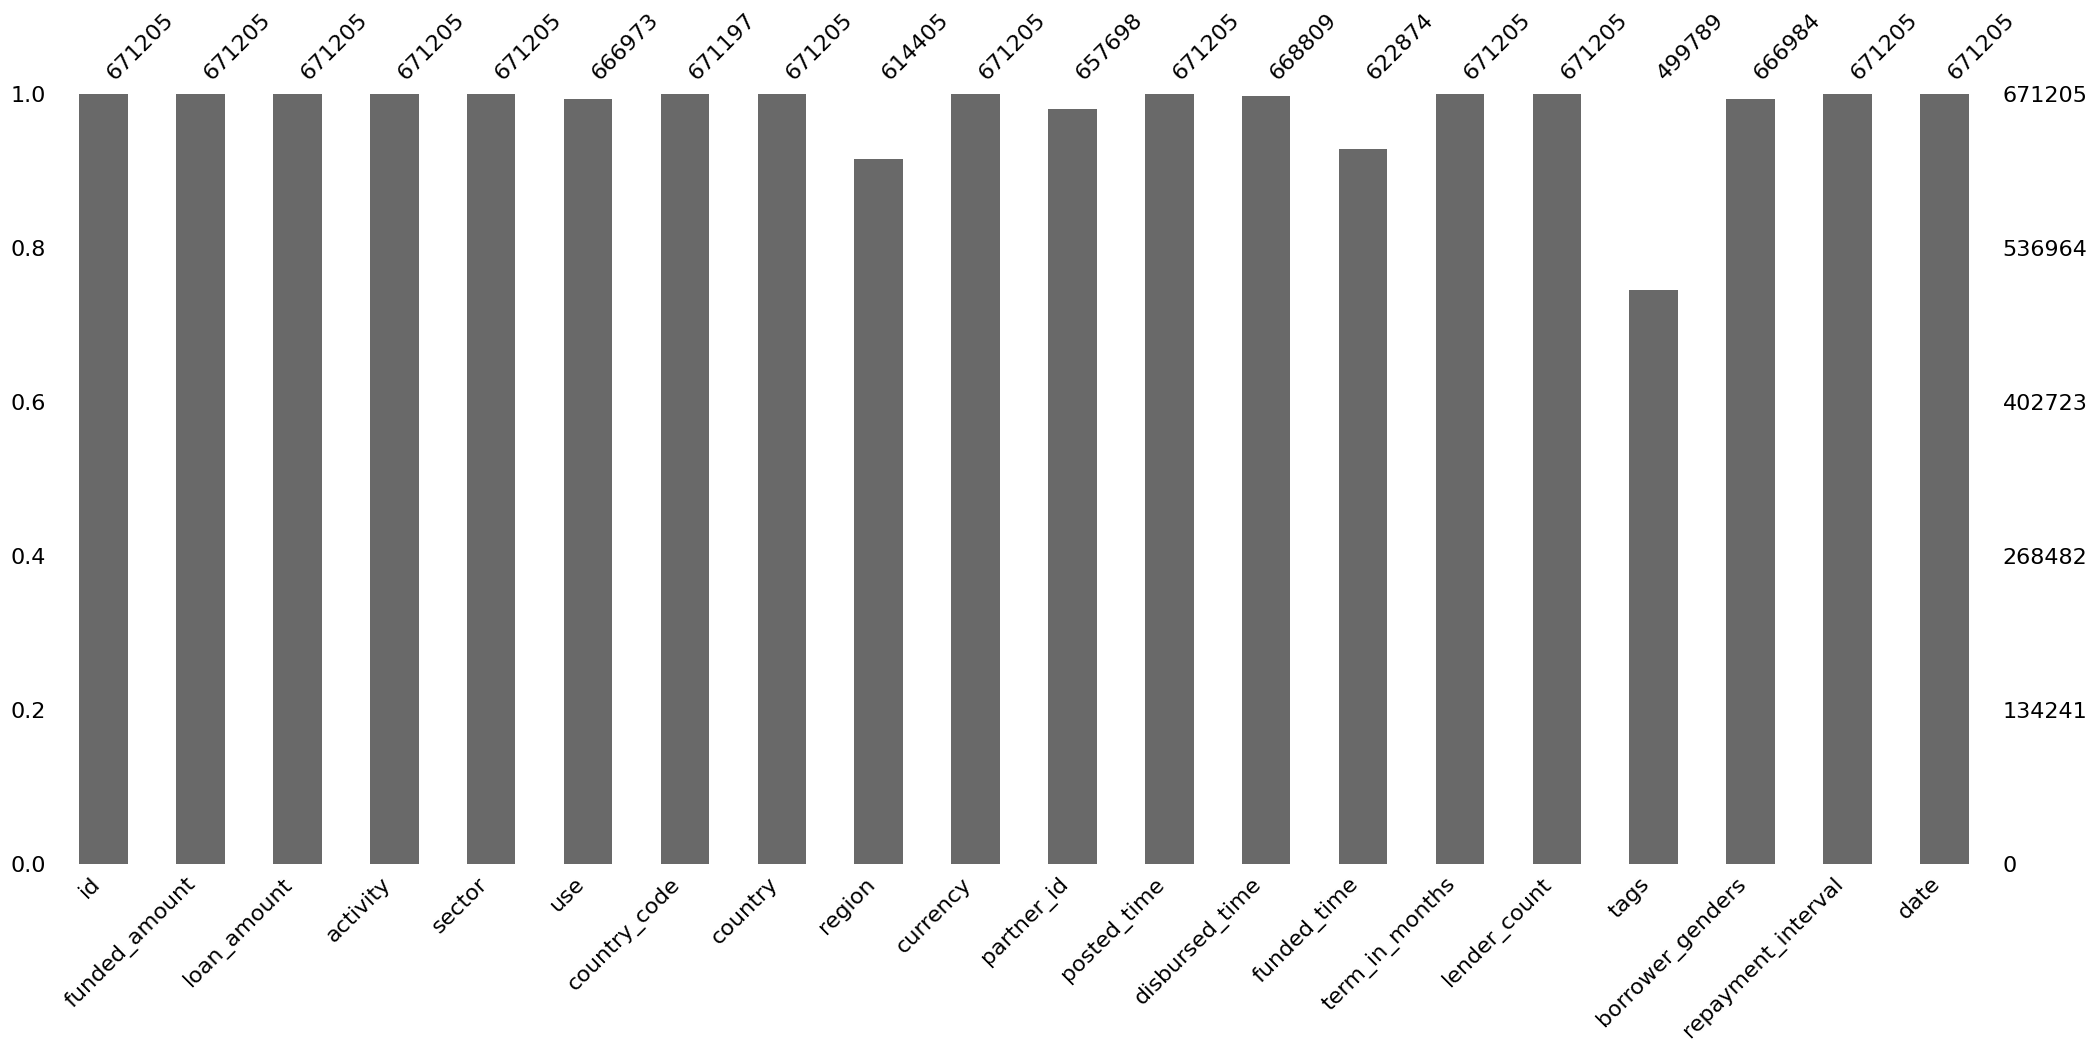

In [ ]:
msno.bar(df)

## creamos una copia del datasewt original àra aplicarle cambios importantes como borrar columnas, cambiar tipos de datos, ect


In [ ]:
kiva_loans_df = df.copy()

## Borramos las columnas que no

In [ ]:
'''
Borramos 'country_code' porque es redundante ya que hay una columna 'country',
Borramos 'tags' porque al tener tantos valores faltantes no nos aporta información de valor,
Borramos 'partnet_id' porque no es una información que nos provea mucho valor,
Borramos 'borrower_genders' porque no es una información que nos provea mucho valor,
Borramos 'date' porque la columna 'posted_time' ya nos devuelve el mismo valor,
'''
cols_to_drop = ['country_code','tags','partner_id','borrower_genders','date', 'funded_time', 'region', 'use']
for col in cols_to_drop:
    if col in kiva_loans_df.columns:
        kiva_loans_df = kiva_loans_df.drop(columns=col)

## vemos que ahora tenemos 12 columnas y no 20


In [ ]:
kiva_loans_df.shape

(671205, 12)

In [ ]:
kiva_loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   country             671205 non-null  object 
 6   currency            671205 non-null  object 
 7   posted_time         671205 non-null  object 
 8   disbursed_time      668809 non-null  object 
 9   term_in_months      671205 non-null  float64
 10  lender_count        671205 non-null  int64  
 11  repayment_interval  671205 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 61.5+ MB


In [ ]:
kiva_loans_df["posted_time"] = pd.to_datetime(kiva_loans_df["posted_time"], errors="coerce")
kiva_loans_df["disbursed_time"] = pd.to_datetime(kiva_loans_df["disbursed_time"], errors="coerce")
## nomalizar a la fecha ( eliminar la hora, establecida en medianoche )manteniendo el tipo
kiva_loans_df["posted_time"] = kiva_loans_df["posted_time"].dt.normalize()
kiva_loans_df["disbursed_time"] = kiva_loans_df["disbursed_time"].dt.normalize()

In [ ]:
kiva_loans_df.head(3)

,id,funded_amount,loan_amount,activity,sector,country,currency,posted_time,disbursed_time,term_in_months,lender_count,repayment_interval
0,653051,300.0,300.0,Fruits & Vegetables,Food,Pakistan,PKR,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,12.0,12,irregular
1,653053,575.0,575.0,Rickshaw,Transportation,Pakistan,PKR,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,11.0,14,irregular
2,653068,150.0,150.0,Transportation,Transportation,India,INR,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,43.0,6,bullet


## tomamos la scolumnas de tipo de daro "objeto" y les definimos el tipo de dato "string"

In [ ]:
for col in kiva_loans_df.columns:
    if kiva_loans_df[col].dtype == 'object':
        kiva_loans_df[col] = kiva_loans_df[col].astype('string')

## verificamos nuevamente el tipo de datos d elas columnas

In [ ]:
kiva_loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  671205 non-null  int64              
 1   funded_amount       671205 non-null  float64            
 2   loan_amount         671205 non-null  float64            
 3   activity            671205 non-null  string             
 4   sector              671205 non-null  string             
 5   country             671205 non-null  string             
 6   currency            671205 non-null  string             
 7   posted_time         671205 non-null  datetime64[ns, UTC]
 8   disbursed_time      668809 non-null  datetime64[ns, UTC]
 9   term_in_months      671205 non-null  float64            
 10  lender_count        671205 non-null  int64              
 11  repayment_interval  671205 non-null  string             
dtypes: datetime64[ns

## nos aseguramos que los datos de tipo "str" no tengan espacios innecesarios y que esten escritas en minuscula

In [ ]:
def clean_text(s):
    return s.astype(str).str.strip().str.lower()

for col in kiva_loans_df.columns:
    if kiva_loans_df[col].dtype == 'string':
        kiva_loans_df[col] = clean_text(kiva_loans_df[col])



## clasificacion de prestamos segun lafecha de desembolso

creamos la columna loan_type para saber si e sun prestamos fue desembolsado antes o despues de la fecha de publicacion:



*   "pre_disbursed": el prestamo se desembolso antes de publicarse (disbursed_time < posted_time)
*   "post_disbursed":el prestamos se desembolsa despues de publocarse ( disbursed_time >=posted_time)



In [ ]:
kiva_loans_df["loan_type"] = np.where(
    kiva_loans_df["disbursed_time"] < kiva_loans_df["posted_time"],
    "pre_disbursed",
    "post_disbursed"
)

In [ ]:
kiva_loans_df.head()

,id,funded_amount,loan_amount,activity,sector,country,currency,posted_time,disbursed_time,term_in_months,lender_count,repayment_interval,loan_type
0,653051,300.0,300.0,fruits & vegetables,food,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,12.0,12,irregular,pre_disbursed
1,653053,575.0,575.0,rickshaw,transportation,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,11.0,14,irregular,pre_disbursed
2,653068,150.0,150.0,transportation,transportation,india,inr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,43.0,6,bullet,pre_disbursed
3,653063,200.0,200.0,embroidery,arts,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-24 00:00:00+00:00,11.0,8,irregular,pre_disbursed
4,653084,400.0,400.0,milk sales,food,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,14.0,16,monthly,pre_disbursed


In [ ]:
 post_disbursed_loans = kiva_loans_df[kiva_loans_df["loan_type"] == "post_disbursed"]

In [ ]:
post_disbursed_loans.head()

,id,funded_amount,loan_amount,activity,sector,country,currency,posted_time,disbursed_time,term_in_months,lender_count,repayment_interval,loan_type
5,1080148,250.0,250.0,services,services,kenya,kes,2014-01-01 00:00:00+00:00,2014-01-30 00:00:00+00:00,4.0,6,irregular,post_disbursed
62,653290,4275.0,4275.0,personal housing expenses,housing,vietnam,vnd,2014-01-02 00:00:00+00:00,2014-01-27 00:00:00+00:00,14.0,144,bullet,post_disbursed
67,1080150,125.0,125.0,energy,services,kenya,kes,2014-01-02 00:00:00+00:00,2014-01-30 00:00:00+00:00,3.0,6,irregular,post_disbursed
99,1080153,5000.0,5000.0,food production/sales,food,united states,usd,2014-01-02 00:00:00+00:00,2014-03-10 00:00:00+00:00,30.0,261,monthly,post_disbursed
114,1080151,125.0,125.0,energy,services,kenya,kes,2014-01-02 00:00:00+00:00,2014-01-30 00:00:00+00:00,3.0,7,irregular,post_disbursed


# creamos una nueva columna

In [ ]:
# obtener min y max reales
min_val = kiva_loans_df['loan_amount'].min()
max_val = kiva_loans_df['loan_amount'].max()

# definir limites segun los rangos
bins = [
    min_val,  # minimo real
    500,
    2500,
    10000,
    max_val   # maximo real
]

labels = ['micro', 'small', 'medium', 'large']

kiva_loans_df['loan_amount_category'] = pd.cut(kiva_loans_df['loan_amount'], bins=bins, labels=labels, right=False)

# ver resumen
print(kiva_loans_df['loan_amount_category'].value_counts())
print("Min:", min_val, "Max:", max_val)

loan_amount_category
micro     330534
small     299111
medium     40144
large       1415
Name: count, dtype: int64
Min: 25.0 Max: 100000.0


In [ ]:
kiva_loans_df.shape

(671205, 14)

In [ ]:
kiva_loans_df.head()

,id,funded_amount,loan_amount,activity,sector,country,currency,posted_time,disbursed_time,term_in_months,lender_count,repayment_interval,loan_type,loan_amount_category
0,653051,300.0,300.0,fruits & vegetables,food,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,12.0,12,irregular,pre_disbursed,micro
1,653053,575.0,575.0,rickshaw,transportation,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,11.0,14,irregular,pre_disbursed,small
2,653068,150.0,150.0,transportation,transportation,india,inr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,43.0,6,bullet,pre_disbursed,micro
3,653063,200.0,200.0,embroidery,arts,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-24 00:00:00+00:00,11.0,8,irregular,pre_disbursed,micro
4,653084,400.0,400.0,milk sales,food,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,14.0,16,monthly,pre_disbursed,micro


## visualicemos la informacion que hacemos limpiando

# Histograma

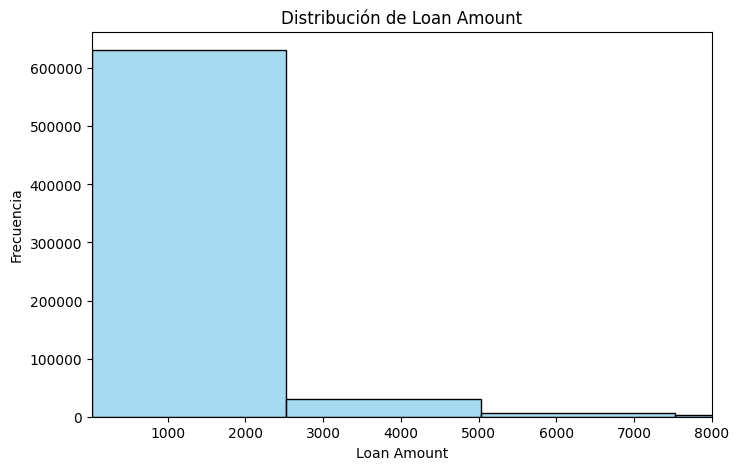

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(kiva_loans_df['loan_amount'], bins=40, kde=False, color='skyblue')
plt.title('Distribución de Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frecuencia')
plt.xlim(25,8000)
plt.show()

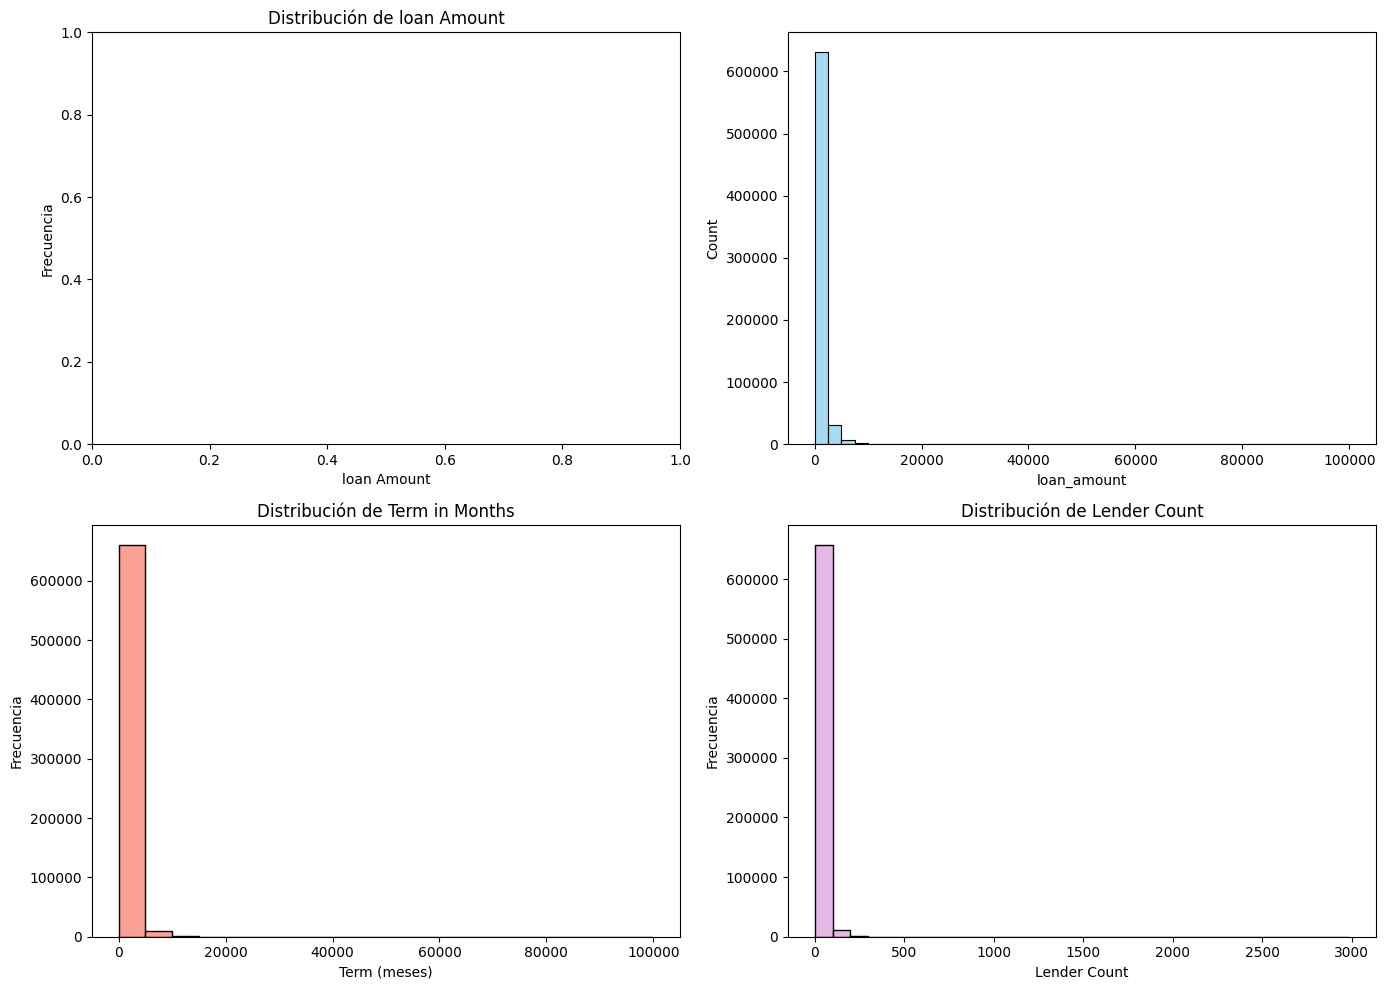

In [ ]:
#from matplotlib import axes
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

sns.histplot(df['loan_amount'], bins=40, kde=False, color='skyblue', ax=axes[1])
axes[0].set_title('Distribución de loan Amount')
axes[0].set_xlabel('loan Amount')
#axes [0].xlim(25,8000)
axes[0].set_ylabel('Frecuencia')



# Funded Amount
sns.histplot(df['funded_amount'], bins=20, kde=False, color='salmon', ax=axes[2])
axes[2].set_title('Distribución de Term in Months')
axes[2].set_xlabel('Term (meses)')
axes[2].set_ylabel('Frecuencia')

# Lender Count
sns.histplot(df['lender_count'], bins=30, kde=False, color='plum', ax=axes[3])
axes[3].set_title('Distribución de Lender Count')
axes[3].set_xlabel('Lender Count')
axes[3].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

#Grafico de barras:



*   Para datos discretos como paises, sectores, tipos de loan,etc...




Index(['philippines', 'kenya', 'peru', 'paraguay', 'el salvador',
       'united states', 'cambodia', 'bolivia', 'rwanda', 'ecuador'],
      dtype='object', name='country')
[54476375. 32248405. 30394850. 29412700. 23357725. 23158540. 18817100.
 18276200. 15505600. 14598900.]


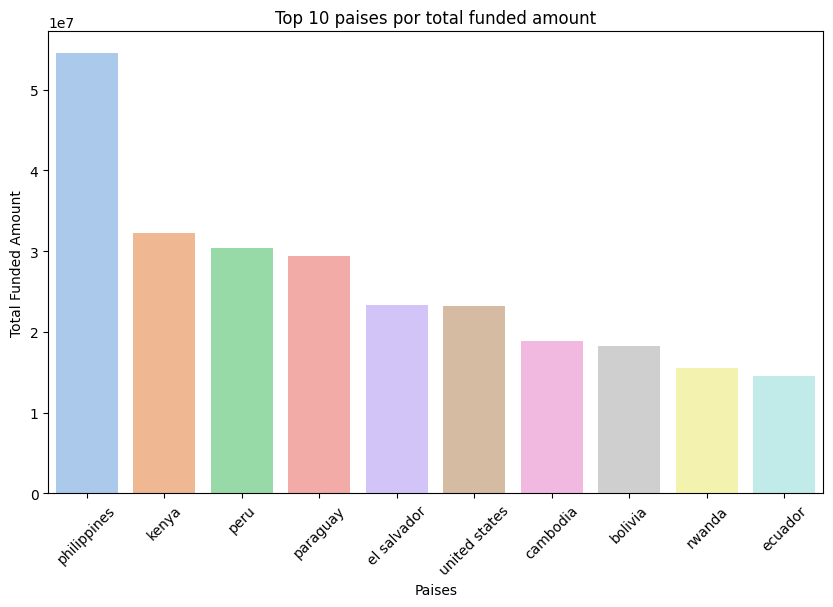

In [ ]:
country_totals = kiva_loans_df.groupby('country')['funded_amount'].sum().sort_values(ascending=False).head(10)

print(country_totals.index)
print(country_totals.values)

plt.figure(figsize=(10,6))
sns.barplot(x=country_totals.index, y=country_totals.values, palette='pastel', hue=country_totals.index, legend=False)
plt.title("Top 10 paises por total funded amount")
plt.xlabel("Paises")
plt.ylabel("Total Funded Amount")
plt.xticks(rotation=45)
plt.show()

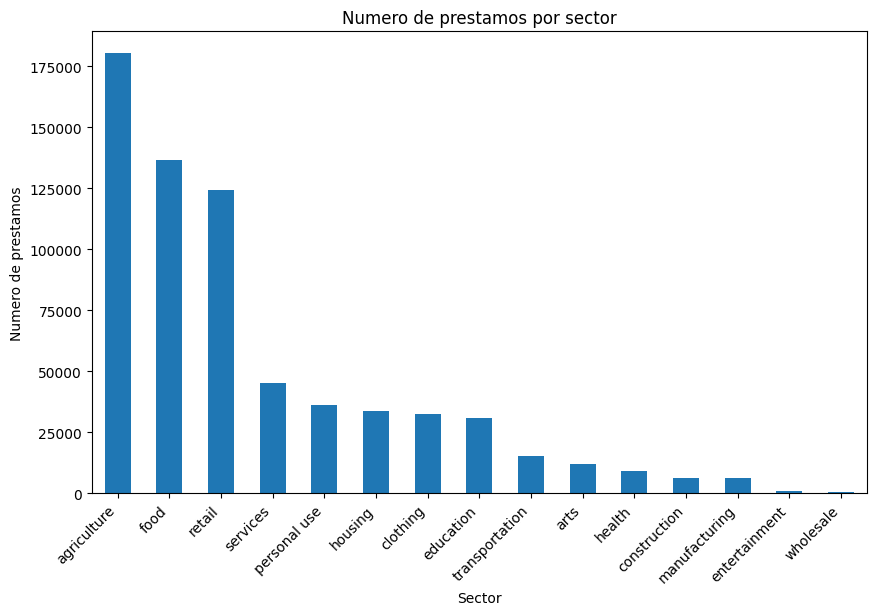

In [ ]:
#from itertools import count
count_by_sector = kiva_loans_df['sector'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,6))
count_by_sector.plot(kind='bar')
plt.title('Numero de prestamos por sector')
plt.xlabel('Sector')
plt.ylabel('Numero de prestamos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout
plt.show()

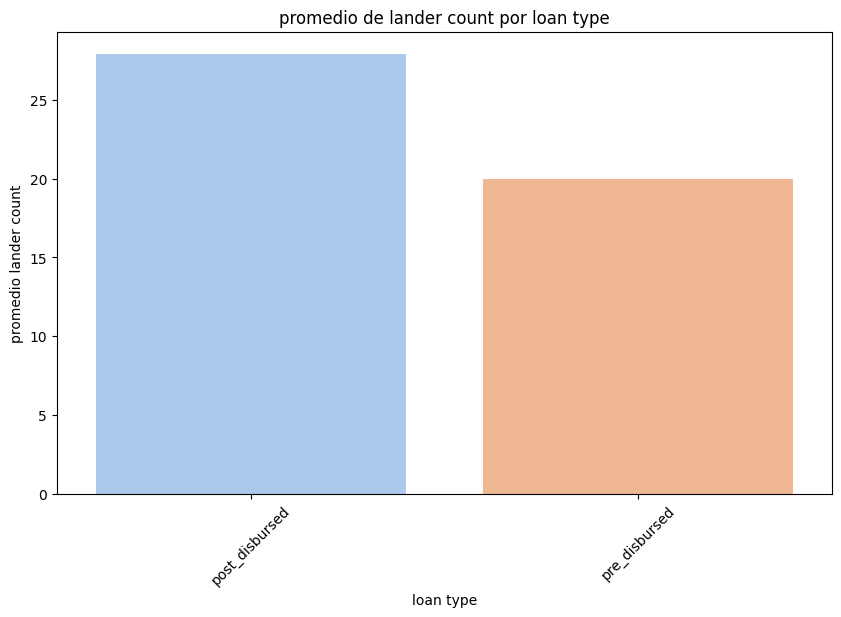

In [ ]:
#agrupar por loan_type y calcular promedio de lander_count
agg = kiva_loans_df.groupby('loan_type')['lender_count'].mean().reset_index()


# graficos de barras
plt.figure(figsize=(10,6))
sns.barplot(x='loan_type', y='lender_count', data=agg, palette='pastel', hue='loan_type', legend=False)
plt.title('promedio de lander count por loan type')
plt.xlabel('loan type')
plt.ylabel('promedio lander count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
kiva_loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   id                    671205 non-null  int64              
 1   funded_amount         671205 non-null  float64            
 2   loan_amount           671205 non-null  float64            
 3   activity              671205 non-null  object             
 4   sector                671205 non-null  object             
 5   country               671205 non-null  object             
 6   currency              671205 non-null  object             
 7   posted_time           671205 non-null  datetime64[ns, UTC]
 8   disbursed_time        668809 non-null  datetime64[ns, UTC]
 9   term_in_months        671205 non-null  float64            
 10  lender_count          671205 non-null  int64              
 11  repayment_interval    671205 non-null  object       

#Graficos de linea:

/tmp/ipython-input-3833886953.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  kiva_loans_df['month'] = kiva_loans_df['posted_time'].dt.to_period('M')


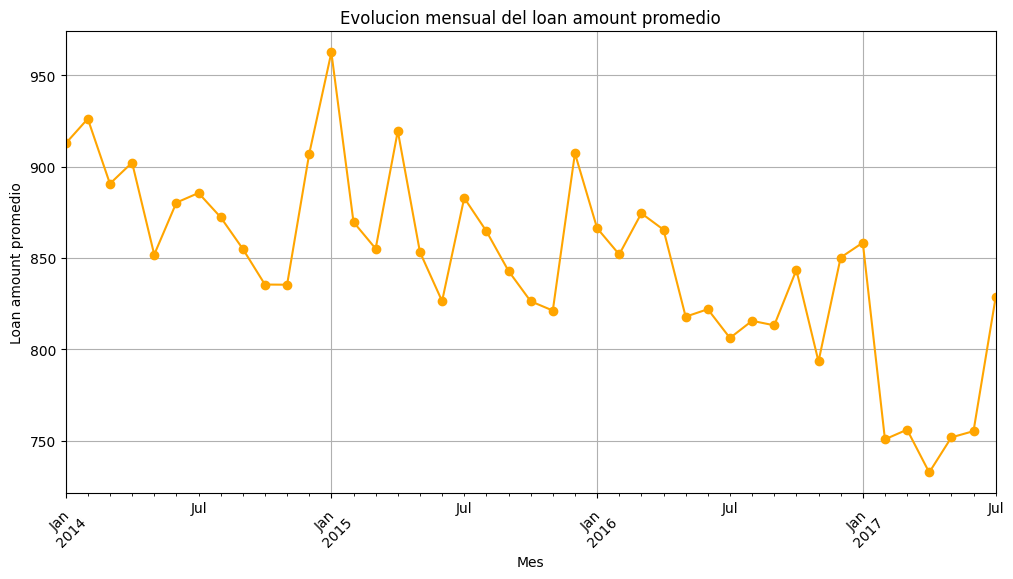

In [ ]:
kiva_loans_df['month'] = kiva_loans_df['posted_time'].dt.to_period('M')
monthly_avg = kiva_loans_df.groupby('month')['loan_amount'].mean()

plt.figure(figsize=(12,6))
monthly_avg.plot(marker='o', color='orange')
plt.title('Evolucion mensual del loan amount promedio')
plt.xlabel('Mes')
plt.ylabel('Loan amount promedio')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
# tendencias estacional

/tmp/ipython-input-654562231.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  kiva_loans_df_line = kiva_loans_df.groupby(pd.Grouper(key='posted_time',freq='M')).agg({'funded_amount': 'sum'}).reset_index()


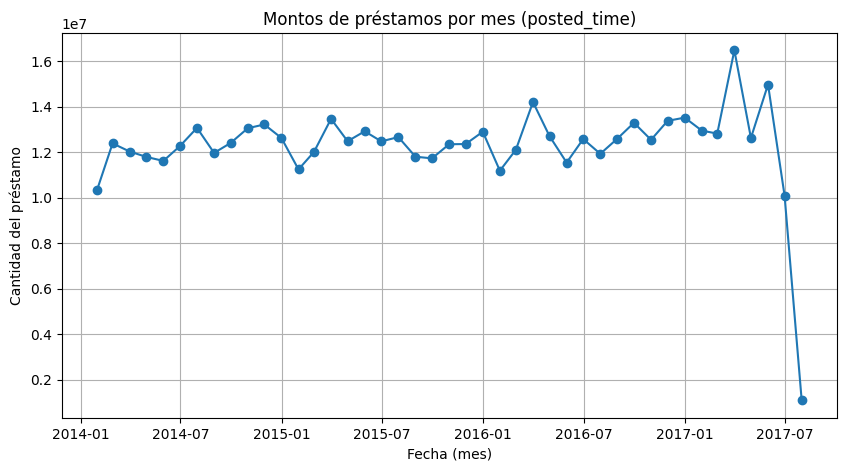

In [ ]:


kiva_loans_df_line = kiva_loans_df.groupby(pd.Grouper(key='posted_time',freq='M')).agg({'funded_amount': 'sum'}).reset_index()

plt.figure(figsize=(10,5))
plt.plot(kiva_loans_df_line['posted_time'], kiva_loans_df_line['funded_amount'], marker='o')
plt.title('Montos de préstamos por mes (posted_time)')
plt.xlabel('Fecha (mes)')
plt.ylabel('Cantidad del préstamo')
plt.grid(True)
plt.show()

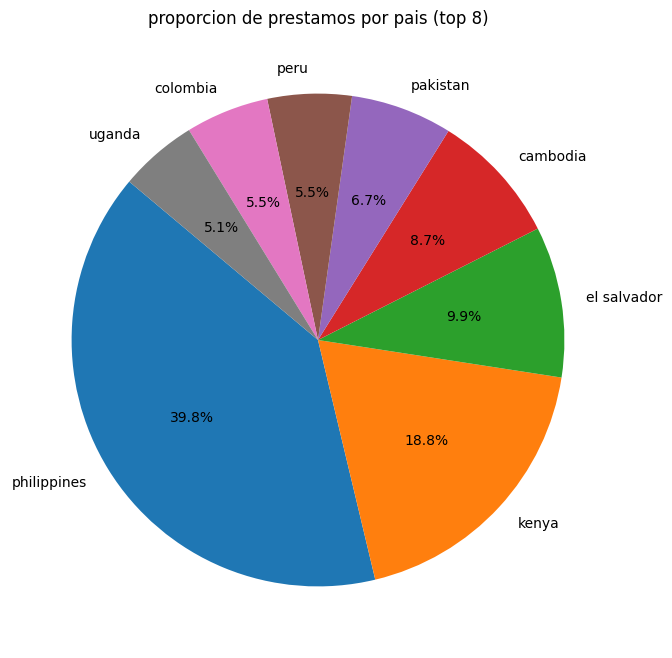

In [ ]:
top_countries = kiva_loans_df['country'].value_counts().nlargest(8)

plt.figure(figsize=(8,8))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=140)
plt.title('proporcion de prestamos por pais (top 8)')
plt.show()

In [ ]:
%%capture
!pip install geodatasets

In [ ]:
import geopandas as gpd
import geodatasets
import os
import requests
import zipfile

In [ ]:
pd.set_option('display.max_columns', None)
# pd.reset_option('display.max_columns')

In [ ]:
world = gpd.read_file("ne_110m_admin_0_countries.shp")
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,POP_YEAR,GDP_MD,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10,ISO_A2,ISO_A2_EH,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_ISO,ADM0_DIFF,ADM0_TLC,ADM0_A3_US,ADM0_A3_FR,ADM0_A3_RU,ADM0_A3_ES,ADM0_A3_CN,ADM0_A3_TW,ADM0_A3_IN,ADM0_A3_NP,ADM0_A3_PK,ADM0_A3_DE,ADM0_A3_GB,ADM0_A3_BR,ADM0_A3_IL,ADM0_A3_PS,ADM0_A3_SA,ADM0_A3_EG,ADM0_A3_MA,ADM0_A3_PT,ADM0_A3_AR,ADM0_A3_JP,ADM0_A3_KO,ADM0_A3_VN,ADM0_A3_TR,ADM0_A3_ID,ADM0_A3_PL,ADM0_A3_GR,ADM0_A3_IT,ADM0_A3_NL,ADM0_A3_SE,ADM0_A3_BD,ADM0_A3_UA,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,LABEL_X,LABEL_Y,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FA,NAME_FR,NAME_EL,NAME_HE,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,FCLASS_ISO,TLC_DIFF,FCLASS_TLC,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,FJI,0,Fiji,FJI,0,Fiji,FJI,0,Fiji,Fiji,FJI,Fiji,None,Fiji,FJ,Republic of Fiji,None,Fiji,None,None,Fiji,None,5,1,2,2,889953.0,11,2019,5496,2019,6. Developing region,4. Lower middle income,FJ,FJ,FJ,FJI,FJI,242,242,242,FJ,FJI,23424813,23424813,Exact WOE match as country,FJI,None,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,-99,-99,Oceania,Oceania,Melanesia,East Asia & Pacific,4,4,4,-99,1,0.0,3.0,8.0,177.975427,-17.826099,1159320625,Q712,فيجي,ফিজি,Fidschi,Fiji,Fiyi,فیجی,Fidji,Φίτζι,פיג'י,फ़िजी,Fidzsi-szigetek,Fiji,Figi,フィジー,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Фіджі,فجی,Fiji,斐济,斐濟,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,Tanzania,TZA,Tanzania,None,Tanz.,TZ,United Republic of Tanzania,None,Tanzania,None,None,Tanzania,None,3,6,2,2,58005463.0,16,2019,63177,2019,7. Least developed region,5. Low income,TZ,TZ,TZ,TZA,TZA,834,834,834,TZ,TZA,23424973,23424973,Exact WOE match as country,TZA,None,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,8,8,5,-99,1,0.0,3.0,8.0,34.959183,-6.051866,1159321337,Q924,تنزانيا,তানজানিয়া,Tansania,Tanzania,Tanzania,تانزانیا,Tanzanie,Τανζανία,טנזניה,तंज़ानिया,Tanzánia,Tanzania,Tanzania,タンザニア,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Танзанія,تنزانیہ,Tanzania,坦桑尼亚,坦尚尼亞,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,SAH,0,Western Sahara,SAH,0,Western Sahara,SAH,1,W. Sahara,Western Sahara,B28,W. Sahara,None,W. Sah.,WS,Sahrawi Arab Democratic Republic,None,Western Sahara,None,Self admin.; Claimed by Morocco,Western Sahara,None,4,7,4,4,603253.0,11,2017,907,2007,7. Least develope

In [ ]:
world['NAME']

,NAME
0,Fiji
1,Tanzania
2,W. Sahara
3,Canada
4,United States of America
...,...
172,Serbia
173,Montenegro
174,Kosovo
175,Trinidad and Tobago


In [ ]:
kiva_loans_df["country"]

,country
0,pakistan
1,pakistan
2,india
3,pakistan
4,pakistan
...,...
671200,paraguay
671201,kenya
671202,kenya
671203,kenya


In [ ]:
kiva_loans_df["country"] = kiva_loans_df["country"].astype(str).str.title().str.strip()
world["NAME"] = world["NAME"].astype(str).str.title().str.strip()

In [ ]:
#Para comprobar que es el mismo
kiva_loans_df['country']

,country
0,Pakistan
1,Pakistan
2,India
3,Pakistan
4,Pakistan
...,...
671200,Paraguay
671201,Kenya
671202,Kenya
671203,Kenya


In [ ]:
country_stats = kiva_loans_df.groupby("country", as_index=False)["loan_amount"].sum()
country_stats = country_stats.rename(columns={"loan_amount": "total_loan_amount"})

print(country_stats.index)
print(country_stats.head())

RangeIndex(start=0, stop=87, step=1)
       country  total_loan_amount
0  Afghanistan            14000.0
1      Albania          2666500.0
2      Armenia         12915400.0
3   Azerbaijan          2888700.0
4       Belize           114025.0


In [ ]:
merged = world.merge(country_stats, left_on="NAME", right_on="country", how="left")

<Axes: >

<Figure size 2000x2000 with 0 Axes>

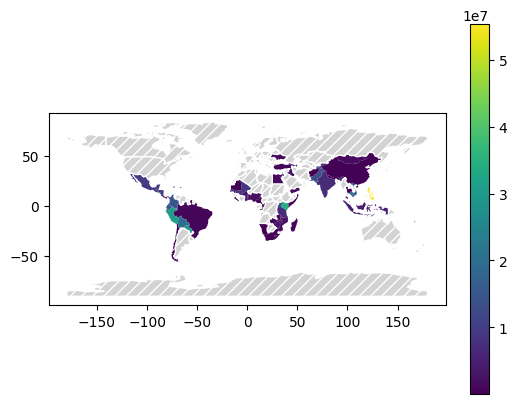

In [ ]:
plt.figure(figsize=(20,20))
merged.plot(
    column="total_loan_amount",
    cmap="viridis",
    legend=True,
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "white",
        "hatch": "///",
        "label": "No Data"
    }
)

In [ ]:
import folium
#una librería de python

In [ ]:
m=folium.Map(location=[20,0], zoom_start=2)

# Agregar capa GeoJson (para parsear) con información por país
folium.GeoJson(merged,style_function=lambda feature:{'fillColor':'#gray' if feature['properties']['total_loan_amount'] is None else '#3186cc','color':'black','weight':0.5,'fillOpacity':0.6},tooltip=folium.GeoJsonTooltip(fields=['NAME','total_loan_amount'],aliases=['País','Total Loan:'],localize=True,sticky=True)).add_to(m)


# Vemos el mapa
m

Regla de Tukey: la regla de Tukey es una forma sencilla de detectar valores atípicos (outliers) usando cuartiles. La idea es ver qué tan lejos están los datos de la parte "normal" del conjunto.
- Q1 = valor donde termina el 25% más bajo de los datos.
- Q3 = valor donde termina el 75% de los datos
- IQR = Q3 - Q1 -> mide la zona donde vive la mitad central de los datos.
Un dato se considera outlier si está demasiado lejos de esa zona:
- Límite inferior = Q1 - 1.5xIQR
- Límite superior = Q3 + 1.5xIQR
Todo lo que quede fuera de ese rango se marca como valor atípico.


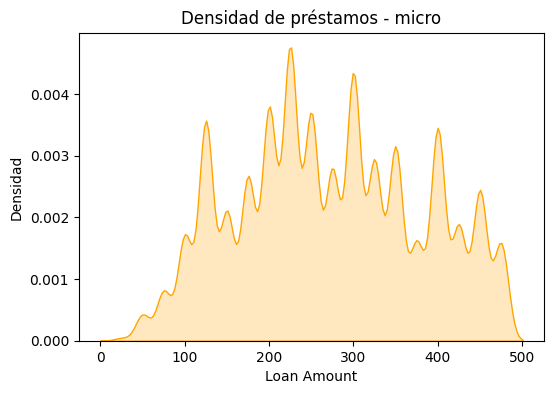

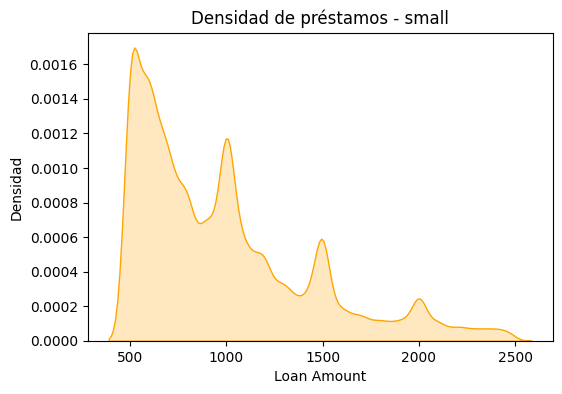

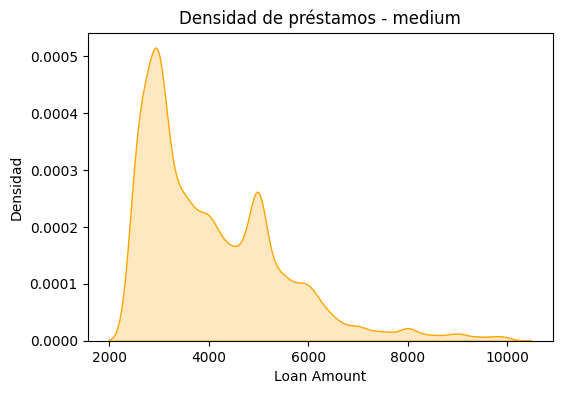

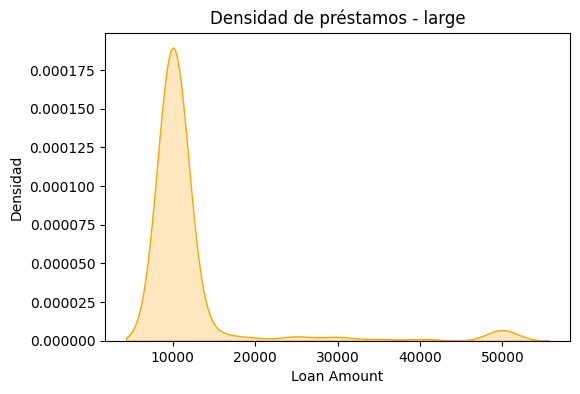

In [ ]:
	import seaborn as sns #no haría falta importarla ahora xq ya se hizo

for cat in labels:
  subset = kiva_loans_df[kiva_loans_df['loan_amount_category'] == cat]
  plt.figure(figsize=(6,4))
  sns.kdeplot(subset['loan_amount'], fill=True, color='orange')
  plt.title(f"Densidad de préstamos - {cat}")
  plt.xlabel("Loan Amount")
  plt.ylabel("Densidad")
  plt.show()

In [ ]:
kiva_loans_df['loan_amount_category'].value_counts()

,count
loan_amount_category,
micro,330534
small,299111
medium,40144
large,1415


In [ ]:
categories = ["micro", "small", "medium", "large"]

for cat in categories:
  df_cat = kiva_loans_df[kiva_loans_df["loan_amount_category"] == cat]

  if df_cat.empty:
    print(f"\n{cat}: (sin datos)")
    continue

  q1=df_cat["loan_amount"].quantile(0.25)
  q3=df_cat["loan_amount"].quantile(0.75)
  iqr = q3-q1

  #Límites para detectar outliers
  lower_bound = q1 -1.5*iqr
  upper_bound = q3 + 1.5*iqr

  #Filtrar outliers
  outliers = df_cat[(df_cat["loan_amount"]<lower_bound) | (df_cat["loan_amount"]>upper_bound)]
  n_outliers=len(outliers)

  print(f"\nCategoría: {cat}")
  print(f" Q1: {q1}")
  print(f" Q3: {q3}")
  print(f" IQR: {iqr}")
  print(f" Outliers: {n_outliers}")


Categoría: micro
 Q1: 200.0
 Q3: 350.0
 IQR: 150.0
 Outliers: 0

Categoría: small
 Q1: 625.0
 Q3: 1200.0
 IQR: 575.0
 Outliers: 10204

Categoría: medium
 Q1: 3000.0
 Q3: 5000.0
 IQR: 2000.0
 Outliers: 797

Categoría: large
 Q1: 10000.0
 Q3: 10000.0
 IQR: 0.0
 Outliers: 183


In [ ]:
folder = "/content/drive/MyDrive/ColabNotebooks"
os.makedirs(folder, exist_ok=True)

kiva_loans_df.to_csv(f"{folder}/kiva_clean.csv", index=False)

In [ ]:
kiva_loans_df.to_csv("kiva_clean.csv")